# Classification of MINST Dataset built using a neural network (using Tensorflow)

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load and preprocess MNIST data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28)) / 255.0
test_images = test_images.reshape((10000, 28*28)) / 255.0

In [19]:
# Define the model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(10, activation='softmax')
])


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
from sklearn.model_selection import train_test_split

# Split the original training set into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

In [14]:
# Train the model and store history
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9904 - loss: 0.0324 - val_accuracy: 0.9897 - val_loss: 0.0332
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9927 - loss: 0.0233 - val_accuracy: 0.9875 - val_loss: 0.0385
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9944 - loss: 0.0194 - val_accuracy: 0.9880 - val_loss: 0.0373
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9957 - loss: 0.0155 - val_accuracy: 0.9870 - val_loss: 0.0447
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9956 - loss: 0.0142 - val_accuracy: 0.9871 - val_loss: 0.0392
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9972 - loss: 0.0100 - val_accuracy: 0.9860 - val_loss: 0.0466
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9970 - loss: 0.0096 - val_accuracy: 0.9847 - val_loss: 0.0544
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9974 - loss: 0.0092 - 

In [15]:
# Make predictions
predictions = model.predict(test_images)
predicted_labels = predictions.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9776 - loss: 0.0958

Test Accuracy: 0.9799


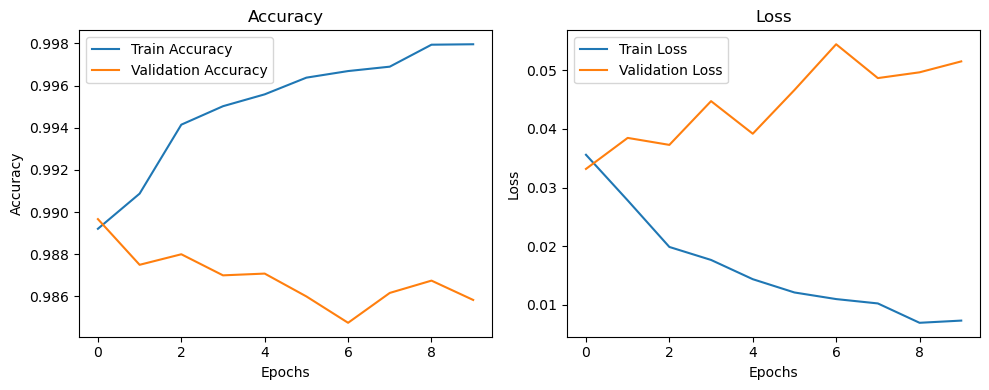

In [16]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


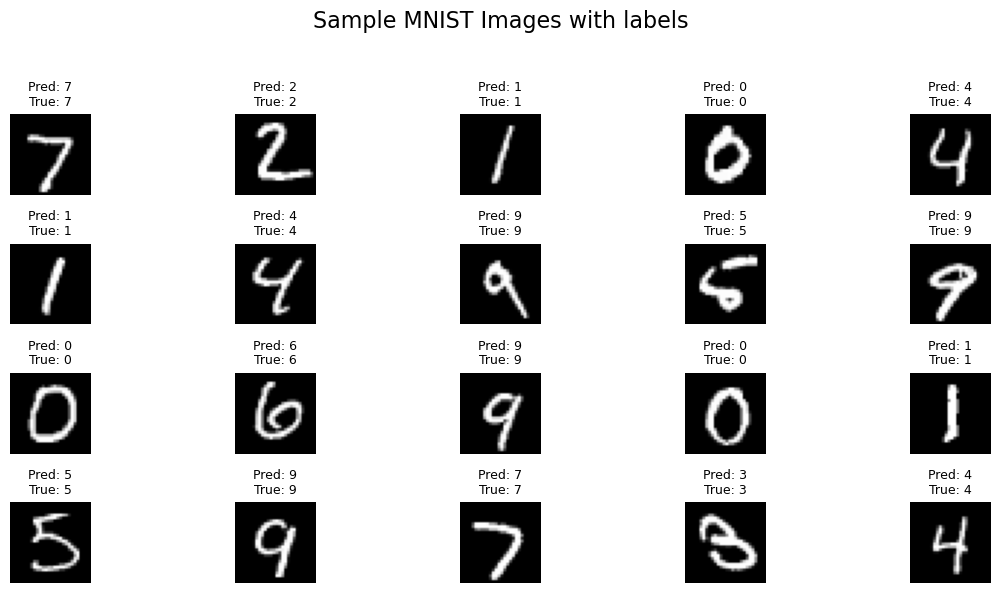

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on test data
predictions = model.predict(test_images)
predicted_labels = predictions.argmax(axis=1)

# Display the first 20 test images with predicted and true labels
plt.figure(figsize=(12, 6))
plt.suptitle("Sample MNIST Images with labels", fontsize=16)

for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {test_labels[i]}", fontsize=9)
    plt.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # To make space for suptitle
plt.show()